# Workshop 2 - Overview of seaborn plotting functions

This part will introduce, at a high-level, the different kinds of functions that you will encounter.

__Objectives:__
* Understand what are axes-level functions and what are figure-level functions.
* Know how to change attributes in axes-level plots and in figure-level plots.
* Understand the differences between them. 

### 3 modules in seaborn

In seaborn, there are 3 modules for creating similar visualisations:

* Relational
* Distributional
* Categorical 

For example, the [distribution module](https://seaborn.pydata.org/api.html#distribution-api) defines functions that specialise in representing the distribution of datapoints. 

![](figs/screenshot_distribution_module.png)

This includes familiar methods like the histogram:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

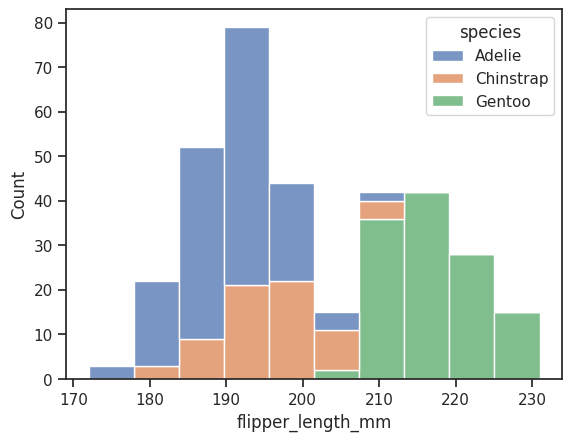

In [2]:
sns.set_theme(style="ticks")
#sns.set_style("white")
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

Along with similar, but perhaps less familiar, options such as kernel density estimation:

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

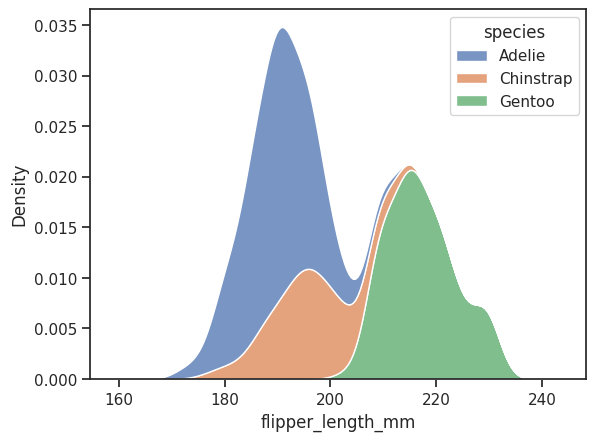

In [3]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

Functions within a module share a lot of underlying code and offer similar features that may not be present in other modules, such as `multiple="stack"` in the example above, you may not see this parameter in other modules.

### Figure-level vs axes-level functions

In addition to the different modules, there is a classification of seaborn functions as "axes-level" or "figure-level". 

The examples above `sns.histplot()` and `sns.kdeplot()` are __axes-level__ functions. They plot data onto a single `matplotlib.pyplot.axes` object:

<Axes: >

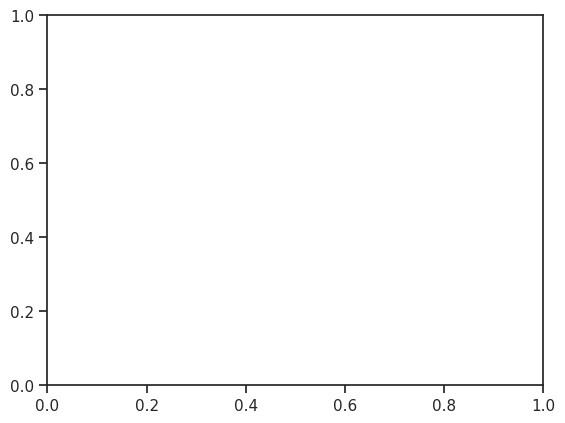

In [4]:
# creating a matplotlib.pyplot.axes object
plt.axes()

In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a `FacetGrid`, that manages the figure:

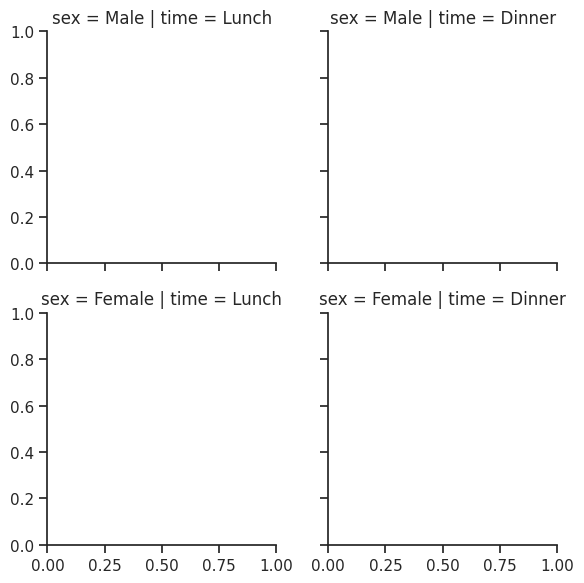

In [5]:
tips = sns.load_dataset("tips")

# creating a seaborn.FacetGrid object
sns.FacetGrid(tips, col="time", row="sex")

In seaborn, each module has one figure-level function and several axes-level functions. The figure-level function offers a unitary interface to its various axes-level functions. 

The organisation of functions look like this:

![](figs/function_overview.png)

For example, `displot()` is the figure-level function for the distributions module. Its default behaviour is to draw a histogram, using the same code as `histplot` behind the scenes:

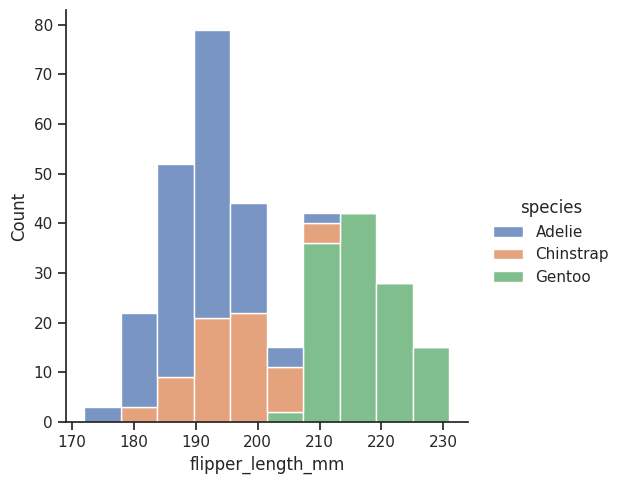

In [6]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

To draw a kernel density plot instead, using the same code as `kdeplot()`, select it using the `kind` parameter:

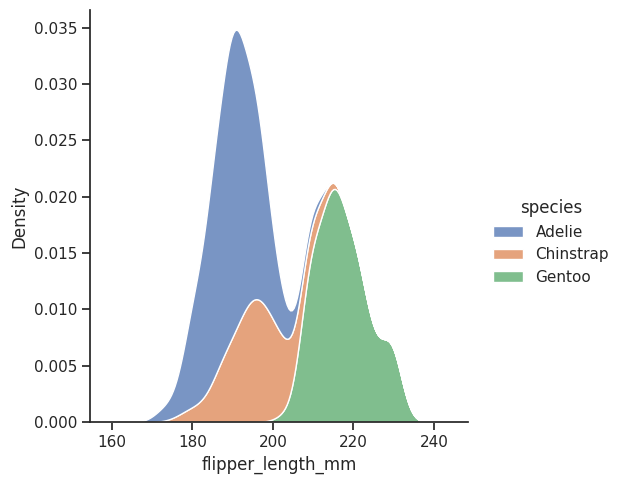

In [7]:
sns.displot(
    data=penguins, x="flipper_length_mm", hue="species", 
    multiple="stack", kind="kde")

You'll notice that the figure-level plots look mostly like their axes-level counterparts, but there are a few differences. Notably, the legend is placed outside the plot.

### Using figure-level functions to create figures with multiple subplots

The most useful feature offered by the figure-level function is that they can easily create figures with multiple subplots. For example, instead of stacking the three distributions for each species of penguins in the same axes, we can "facet" them by plotting each distribution across the columns of the figure:

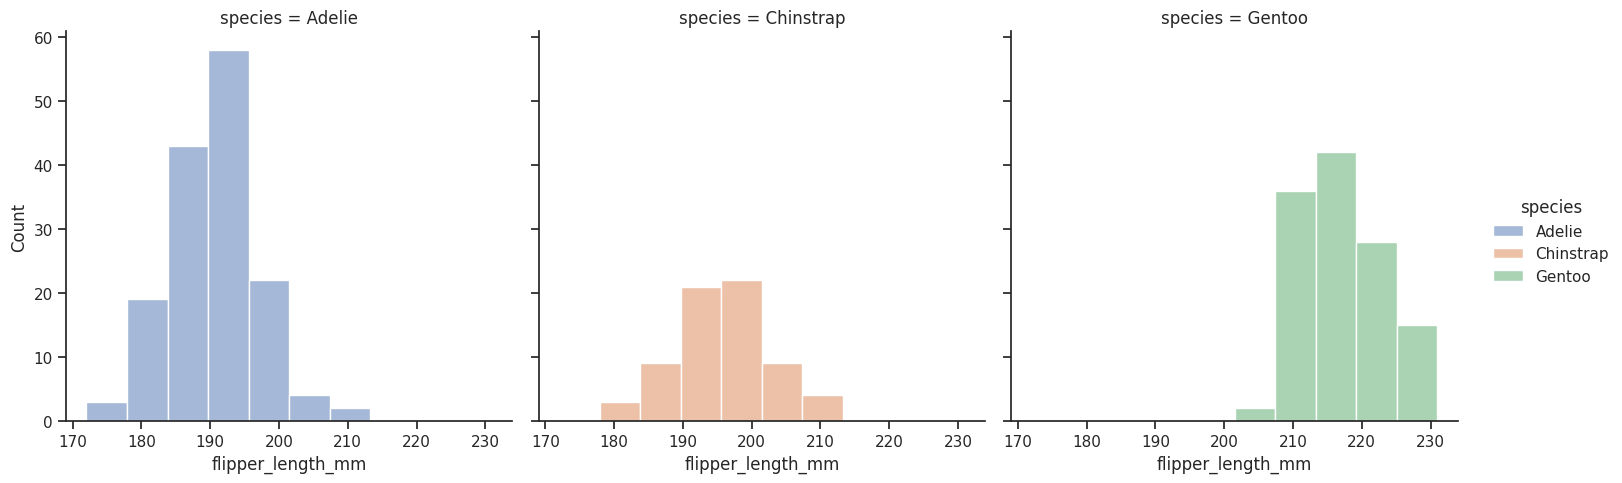

In [8]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

### Axes-level functions make self-contained plots 

The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don't modify anything beyong the axes that they are drawn into. 

The axes-level functions call `matplotlib.pyplot.gca()` internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the "currently-active" axes. But they additionally accept an `ax=` argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:

__Until now, can you understand what functions are figure-level and what functions are axes-level?__

__Run the following code line by line to understand what each line does.__

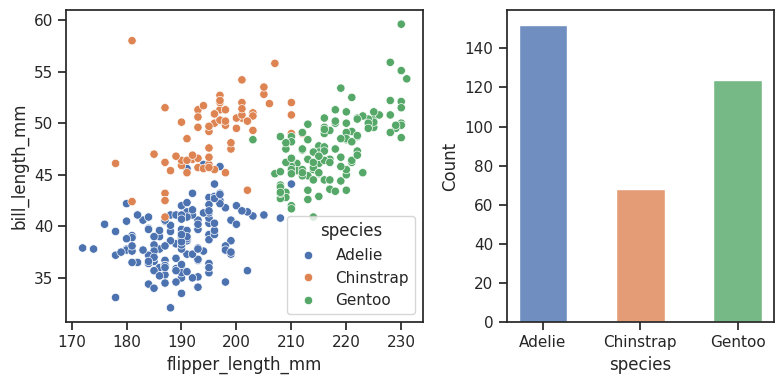

In [9]:
# Creating an active matplotlib figure with 2 axes
f, axs = plt.subplots(1,2, figsize=(8,4), gridspec_kw=dict(width_ratios=[4,3]))

sns.scatterplot(
    data=penguins,
    x="flipper_length_mm", y="bill_length_mm", hue="species",
    ax=axs[0]
)

sns.histplot(
    data=penguins,
    x="species", hue="species",
    shrink=.5, alpha=.8, legend=False,
    ax=axs[1]
)

f.tight_layout()

### Figure-level functions own their figure

In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they "own" their own figure, including its initialisation, so there's no notion of using a figure-level function to draw a plot onto an existing axes. 

Nevertheless, it is possible to go beyond what the figure-level functions offer by accessing the matplotlib axes on the object that they return and adding other elements to the plot that way:

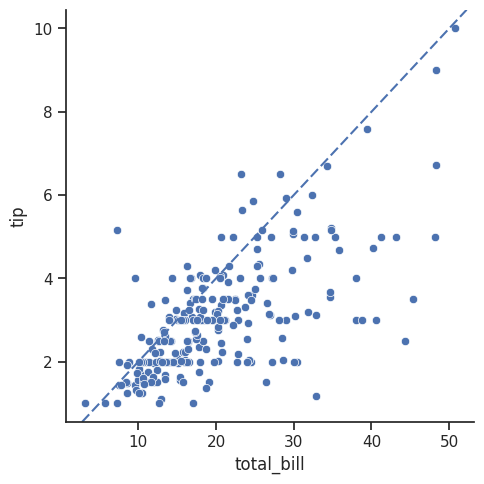

In [10]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10,2), slope=.2, color="b", dashes=(5,2))

__Where is the function `g.ax.axline()` from? Is it a matplotlib function or seaborn function? Do you know the meanings of each option inside that function?__

### Customising plots from a figure-level function

The figure-level functions return a `FacetGrid` instance, which has a few methods for customising attributes of the plot in a way that is "smart" about the subplot organisation. For example, you can change the labels on the external axes using a single line of code: 

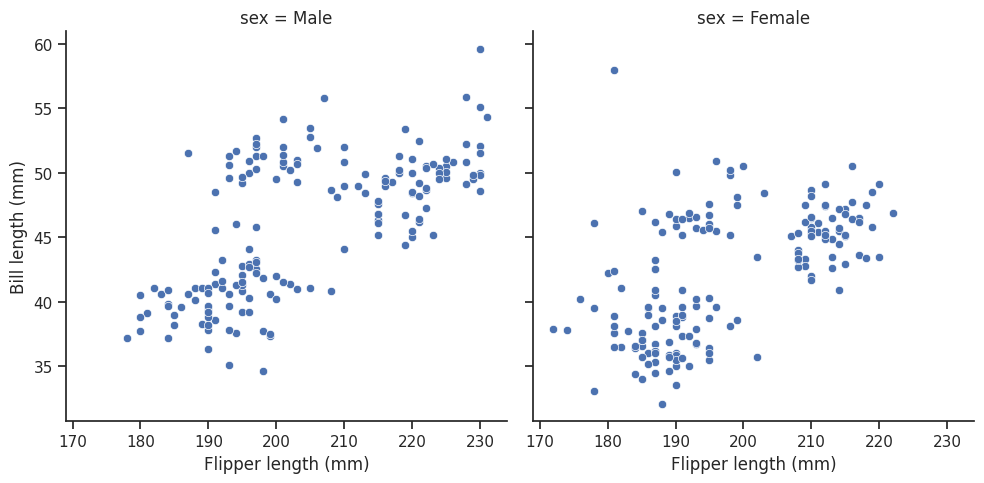

In [11]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

While convenient, this does add a bit of extra complexity, as you need to remember that this method is not part of the matplotlib API and exists only when using a figure-level function.

### Specifying figure sizes in matplotlib

To increase or decrease the size of a matplotlib figure, you set the width and height of the entire figure while setting up the plot (e.g. with the `figsize` parameter of `matplotlib.pyplot.subplots()`), or by calling a method on the figure object (e.g. `matplotlib.Figure.set_size_inches()`). 

When using an axes-level function in seaborn, the same rules apply: the size of the plot is determined by the size of the figure it is part of and the axes layout in that figure. 

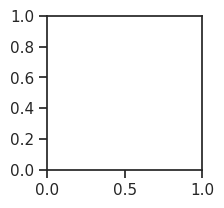

In [12]:
fig, ax = plt.subplots(figsize=(2,2))

__How many axes does the above figure has?__

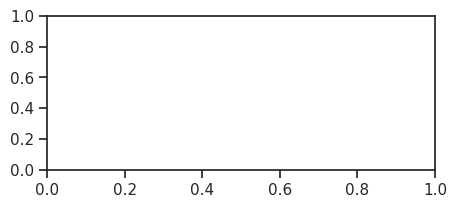

In [13]:
fig, ax = plt.subplots(figsize=(5,2))

__How many axes does the above figure has?__

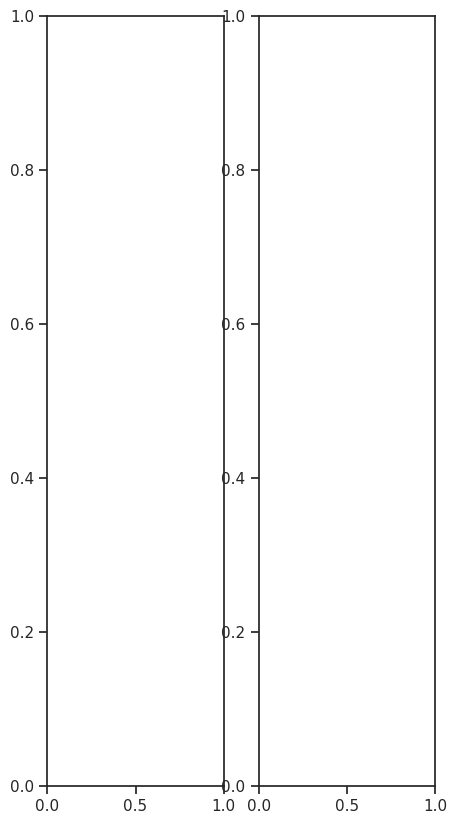

In [14]:
fig, ax = plt.subplots(1,2,figsize=(5,2))
fig.set_size_inches(5,10)

__At this point, do you understand the meanings of `fig, ax = plt.subplots()`?__

### Specifying figure sizes for figure-level functions

When using a figure-level function, there are several key differences. 

1. The figure-level functions themselves have parameters to control the figure size.
2. These parameters, `height` and `aspect`, parameterise the size slightly different than the `width` and `height` in matplotlib. In seaborn, `width=height*aspect`.
3. The parameters correspond to the size of each subplot, rather than the size of overall figure. 

To illustrate the difference between these approaches, here is the default output of `matplotlib.pyplot.subplots()` with one subplot:

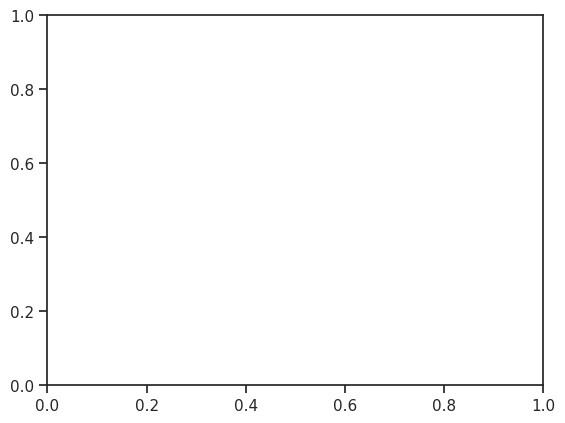

In [15]:
fig, ax = plt.subplots()

A figure with multiple columns will have the same overall size, but the axes will be squeezed horizontally to fit in the space:

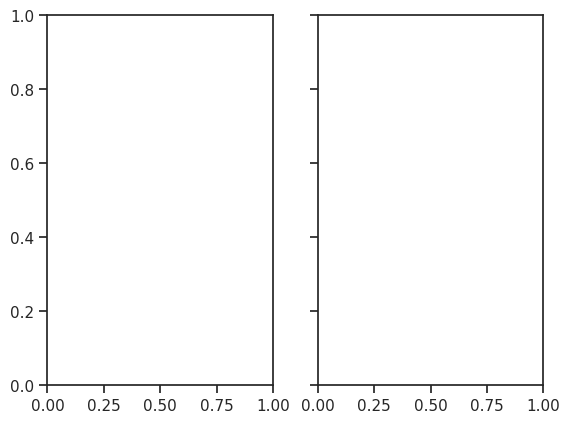

In [16]:
fig, ax = plt.subplots(1,2, sharey=True)

In contrast, a plot created by a figure-level function will be square. To demonstrate that, let's set up an empty plot by using `FacetGrid` directly. The `sns.FacetGrid` happens behind the scenes when we call figure-level functions `relplot()`, `displot()`, or `catplot()`:

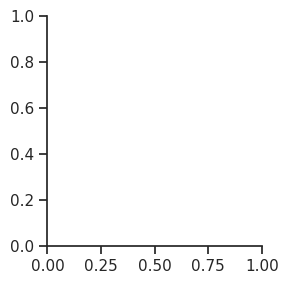

In [17]:
g = sns.FacetGrid(penguins)

When additional columns are added, the figure itself will become wider, so that its subplots have the same size and shape:

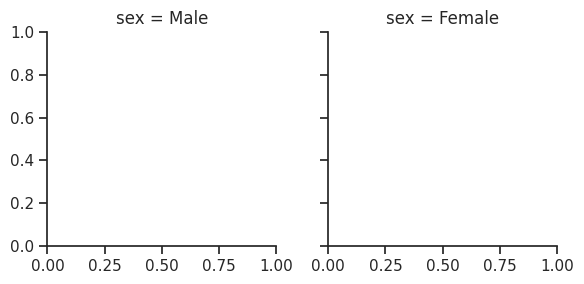

In [18]:
g = sns.FacetGrid(penguins, col="sex")

And you can adjust the size and shape of each subplot without accounting for the total number of rows and columns in the figure:

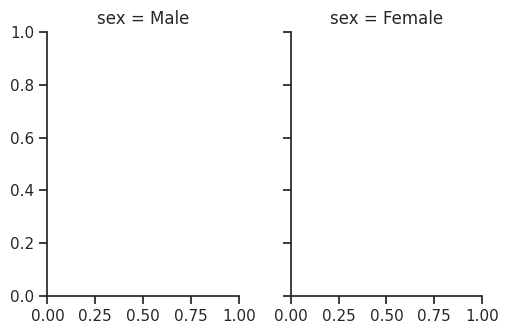

In [19]:
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)

The upshot is that you can assign faceting variables without stopping to think about how you'll need to adjust the total figure size. A downside is that, when you do want to change the figure size, you'll need to remember that things work a bit differently than they do in matplotlib.

### Relative merits of figure-level functions

Here is a summary of the pros and cons that we have discussed above:

| Advantages    | Drawbacks |
| -------- | ------- |
| Easy faceting by data variables  | Many parameters not in function signature    |
| Legend outside of plot by default | Cannot be part of a larger matplotlib figure     |
| Easy figure-level customisation    | Different API from matplotlib    |
| Different figure size parameterisation | Different figure size parameterisation |

On balance, the figure-level functions add some additional complexity that can make things more confusing for beginners, but their distinct features give them additional power. The tutorial documentation mostly uses the figure-level functions, because they produce slightly cleaner plots, and we generally recommend their use for most applications. The one situation where they are not a good choice is when you need to make a complex, standalone figure that composes multiple different plot kinds. At this point, it's recommended to set up the figure using matplotlib directly and to fill in the individual components using axes-level functions.

### Combining multiple views on the data 

Two important plotting functions in seaborn don't fit cleanly into the classification scheme discussed above. These functions, `jointplot()` and `pairplot()`, employ multiple kinds of plots from different modules to represent multiple aspects of a dataset in a single figure. Both plots are figure-level functions and create figures with multiple subplots by default. But they use different objects to manage the figure: `JointGrid` and `PairGrid`, respectively. 

`jointplot()` plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately:

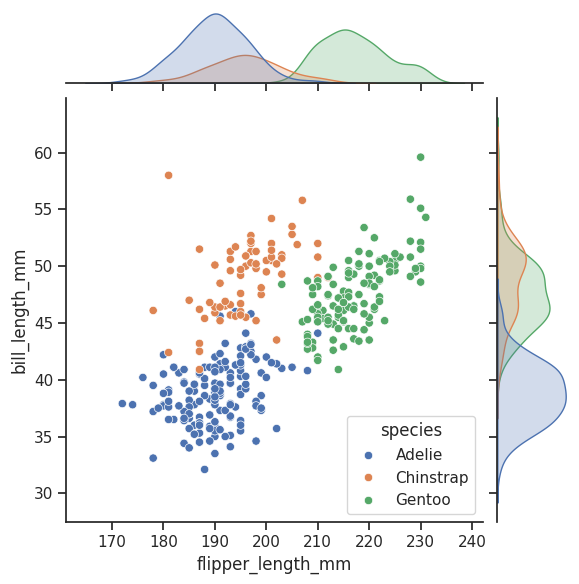

In [20]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

`pairplot()` is similar - it combines joint and marginal views - but rather than focusing on a single relationship, it visualise every pairwise combination of variables simultaneously:

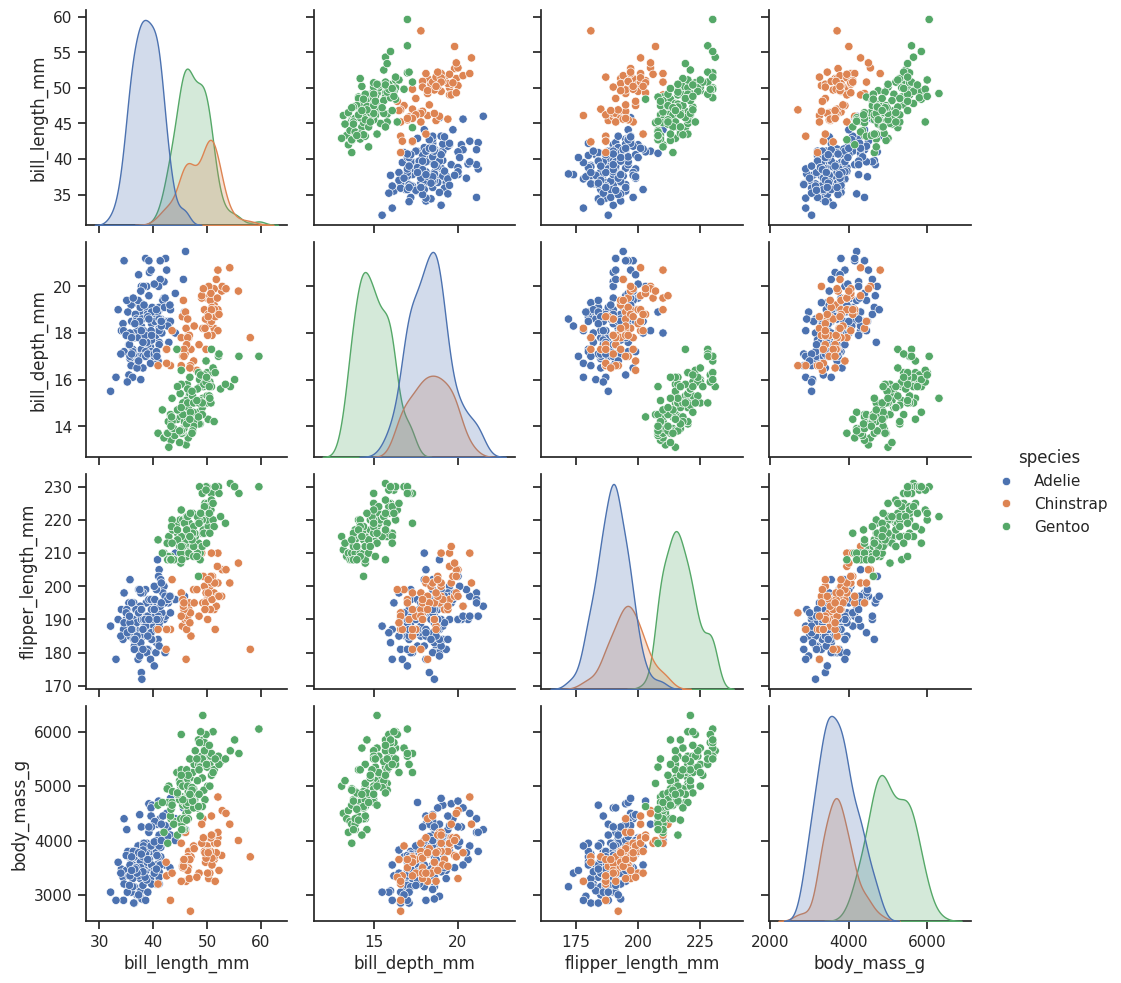

In [21]:
sns.pairplot(data=penguins, hue="species")

Behind the scenes, these functions are using axes-level functions that you have already met (`scatterplot()` and `kdeplot()`), and they also have a `kind` parameter that lets you quickly swap in a different representation:

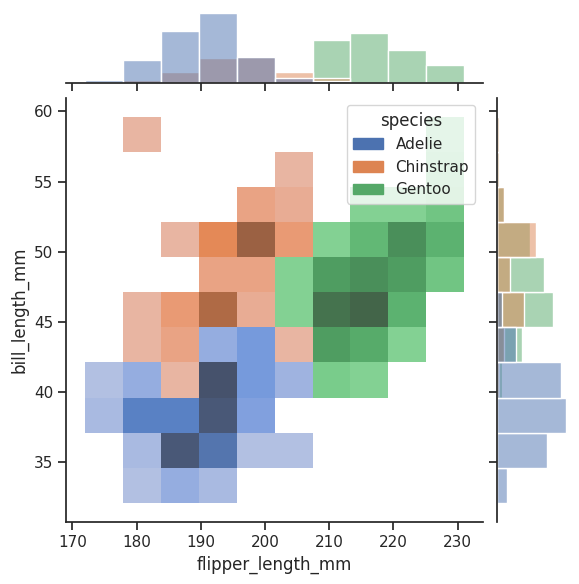

In [22]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")

# References

* [Fundamentals of Data Visualization](https://clauswilke.com/dataviz/) - *Claus O. Wilke*
* [ChatGPT](https://chat.openai.com/)
* [Seaborn](https://seaborn.pydata.org/index.html)
* [Matplotlib](https://matplotlib.org/stable/) 